## Step-1 : Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

## Load the Air Quality Data

In [4]:
data = pd.read_csv(r"C:\Users\IP G3\Downloads\archive\Air_Quality.csv")

In [5]:
data.head(10)

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000
5,2024-01-01 05:00:00+00:00,Brasilia,239.0,NaN,9.4,1.9,44.0,8.7,12.4,17.600000
6,2024-01-01 06:00:00+00:00,Brasilia,215.0,NaN,6.8,1.7,47.0,7.5,10.7,18.800000
7,2024-01-01 07:00:00+00:00,Brasilia,205.0,NaN,6.0,1.8,46.0,6.1,8.7,18.400000
8,2024-01-01 08:00:00+00:00,Brasilia,201.0,NaN,6.1,2.1,45.0,5.7,8.2,18.000000
9,2024-01-01 09:00:00+00:00,Brasilia,199.0,NaN,5.9,2.2,46.0,5.7,8.2,18.400000


In [6]:
data.shape

(52704, 10)

## Step 3 - Data Preprocessing

In [11]:
data.isnull().sum()

Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64

In [13]:
data['AQI'].unique()

array([16.8     , 16.      , 15.599999, ..., 15.991668, 19.199997,
       19.18333 ])

## Step 4 : Select Features - X and Target - Y

In [15]:
X = data[['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']]   
Y = data['AQI']

## Step - 5 : Split data into Training and Testing Sets

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state= 42)

## Step - 6: Train the Linear Regressuion Model

In [19]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

## Step - 7 : Make Preduictions and Evaluate the Model

In [21]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
r2 = r2_score(Y_test, Y_pred)
print('R2 Score:', r2)

Mean Absolute Error: 7.942476936368742
Mean Squared Error: 130.61997273158786
Root Mean Square Error: 11.428909516291913
R2 Score: 0.808110926271135


In [23]:
n = X.shape[0]
k = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n-1)/(n-k-1))
print('Adjusted R2 value for this model:', adj_r2)


Adjusted R2 value for this model: 0.808089078074039


## Step - 8 : Visualization

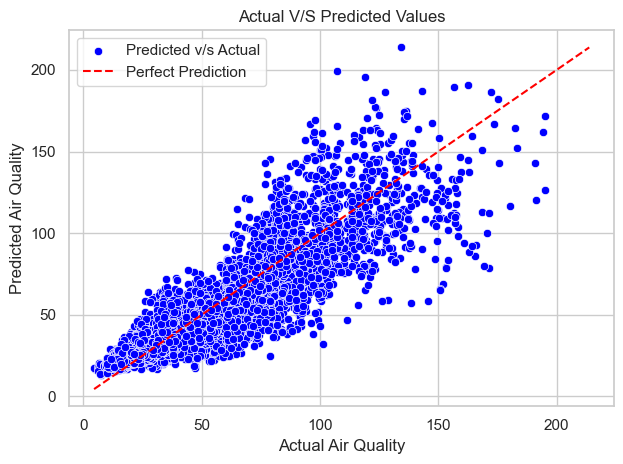

In [55]:
sns.scatterplot(x = Y_test, y = Y_pred, color = 'blue', label = 'Predicted v/s Actual')
min_value = min(Y_test.min(), Y_pred.min())
max_value= max(Y_test.max(), Y_pred.max())
plt.plot([min_value, max_value],[min_value, max_value], color = 'red', linestyle = '--', label ='Perfect Prediction') 
plt.xlabel('Actual Air Quality')
plt.ylabel('Predicted Air Quality')
plt.title('Actual V/S Predicted Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

what's new in this visualization plt.plot([min_val, max_val], [min_val, max_val] we use this syntax because if we simply use plt.plot(Y_test, Y_pred then  it connects the dots with lines, making it look messy so to draw a diagonal reference line: plt.plot([x1, x2], [y1, y2]) it simply draws a line from point (x1, y1) to point (x2, y2). So here in this case We want a line from:

(min_val, min_val) ➡ bottom-left corner

to (max_val, max_val) ➡ top-right corner

This draws a perfect diagonal line — where actual = predicted


